In [16]:
%matplotlib inline

In [17]:
import json
import pandas as pd
import seaborn as sns
import os

In [18]:
data = []
for fname in os.listdir("."):
    if not (fname.startswith("results_") and fname.endswith(".json")):
        continue
    with open(fname) as reader:
        data_json = json.load(reader)
    for method_name, method_data in data_json.items():
        for i_run, method_run in enumerate(method_data):
            #if method_name == "std" and i_run == 2:
            #    continue
            for i_step, step in enumerate(method_run):
                step = dict(step)
                step["method"] = method_name

                for split in ["good", "bad", "diff"]:
                    datum = dict(step)
                    datum["nll"] = datum[split]
                    datum["split"] = split
                    datum["run"] = i_run
                    data.append(datum)

                #datum = dict(step)
                #datum["nll"] = datum["bad"] - datum["good"]
                #datum["split"] = "diff"
                #data.append(datum)

data = pd.DataFrame(data)

<AxesSubplot:xlabel='step', ylabel='nll'>

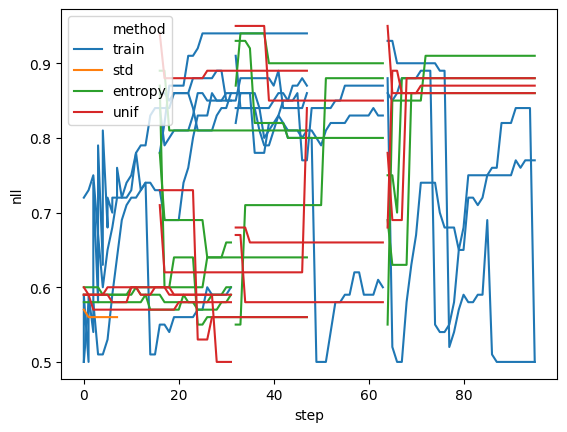

In [19]:
sns.lineplot(data=data.query("split == 'diff'"), x="step", y="nll", hue="method", units="run", estimator=None)

<AxesSubplot:xlabel='step', ylabel='nll'>

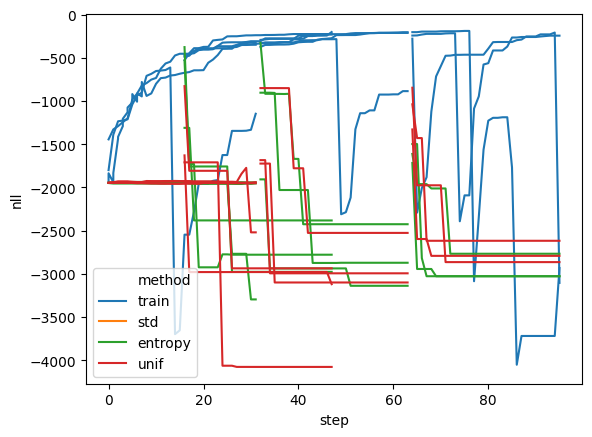

In [20]:
sns.lineplot(data=data.query("split == 'good'"), x="step", y="nll", hue="method", units="run", estimator=None)